<a href="https://colab.research.google.com/github/P1XeLRAGE/fromOldPc/blob/py/hw2_ArtemSushko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

### Часть 1: разминка с `numpy` (2 балла)

__Задание 1.__ Напишите функцию `nan_to_mean(A)`, которая принимает на вход двумерный массив `A` и возвращает массив, полученный из `A` путём замены всех элементов `np.nan` на средние по соответствующему столбцу.

In [ ]:
def nan_to_mean(A: np.ndarray) -> np.ndarray:
    column_mean = np.nanmean(A, axis=0)
    return np.where(np.isnan(A), column_mean, A)
    pass

assert np.isclose(
    nan_to_mean(
        np.array(
            [[3, -1, np.nan], [-1, np.nan, 4], [np.nan, 1, 5], [np.nan, 0, np.nan]]
        )
    ),
    np.array([[3.0, -1.0, 4.5], [-1.0, 0.0, 4.0], [1.0, 1.0, 5.0], [1.0, 0.0, 4.5]]),
).all()


__Задание 2.__  Коля — мастер покера и умеет выигрывать только целые суммы денег от 0 до $n - 1$. Коля решил сыграть на турнире. На вход подаётся массив `p` размера $n$, где `p[i]` -- вероятность, что Коля выиграет на турнире $i$ рублей ($\sum_{i=1}^{n}p_i =1$, $p_i \geqslant 0, \forall i$). Посчитайте математическое ожидание выигрыша Коли на турнире.

In [ ]:
def expected_reward(p: np.ndarray) -> float:
    return p @ np.arange(0, len(p))
    pass

assert expected_reward(np.array([0.4, 0.5, 0.1])) == 0.7

__Задание 3.__ Дана квадратная матрица `A`. Посчитайте произведение диагональных элементов матрицы, __строго__ превосходящих среднее значение элементов всей матрицы.

In [ ]:
def prod_upper_avg_diagonal(a: np.ndarray) -> float:
    l = np.diag(a)[(np.diag(a) > np.mean(a))]
    return np.prod(l)
    pass

assert prod_upper_avg_diagonal(np.array([[ 0,  1,  2,  3],
                                         [ 4,  5,  6,  7],
                                         [ 8,  9, 10, 11],
                                         [12, 13, 14, 15]])) == 150

__Задание 4__. Дано число $n$. Создайте матрицу $A$ размера $n \times n$ такую, что $A[i][j] = i \cdot j$. Нумерация строк и столбцов начинается с нуля.

In [ ]:
def create_ij(n: int) -> np.ndarray:
    a = np.arange(n).reshape(1,n)
    b = a.reshape(n,1)
    return(np.dot(b,a))

assert np.all(create_ij(5) == np.array([[ 0,  0,  0,  0,  0],
                                        [ 0,  1,  2,  3,  4],
                                        [ 0,  2,  4,  6,  8],
                                        [ 0,  3,  6,  9, 12],
                                        [ 0,  4,  8, 12, 16]]))

### Часть 2. `numpy` vs pure Python (3 балла)


__Задание 5__. (1 балл) Выберите одну из функций из заданий 2-4 и имплементируйте её, но без использования сторонних библиотек (считайте, что вам доступны только стандартные библиотеки языка Питон и на вход вместо массивов подаются питоновские списки). Тут можно использовать циклы.

In [ ]:
def create_ij_imlp(n: int) -> list:
    ans = []
    for i in range(n):
        l = []
        for j in range(n):
            l.append(i * j)
        ans.append(l)
    return ans

create_ij_imlp(5)

[[0, 0, 0, 0, 0],
 [0, 1, 2, 3, 4],
 [0, 2, 4, 6, 8],
 [0, 3, 6, 9, 12],
 [0, 4, 8, 12, 16]]

__Задание 6__. (2 балла) Сравните время работы векторизованных (имплементированных с помощью `numpy`) функций с обычными. Для этого с помощью библиотеки `matplotlib` постройте графики зависимости времени исполнения функции от размера входного массива. Перебирайте значения от 1 до $10^6$ по логарифмической шкале. Сделайте выводы.

In [ ]:
import matplotlib.pyplot as plt
import time

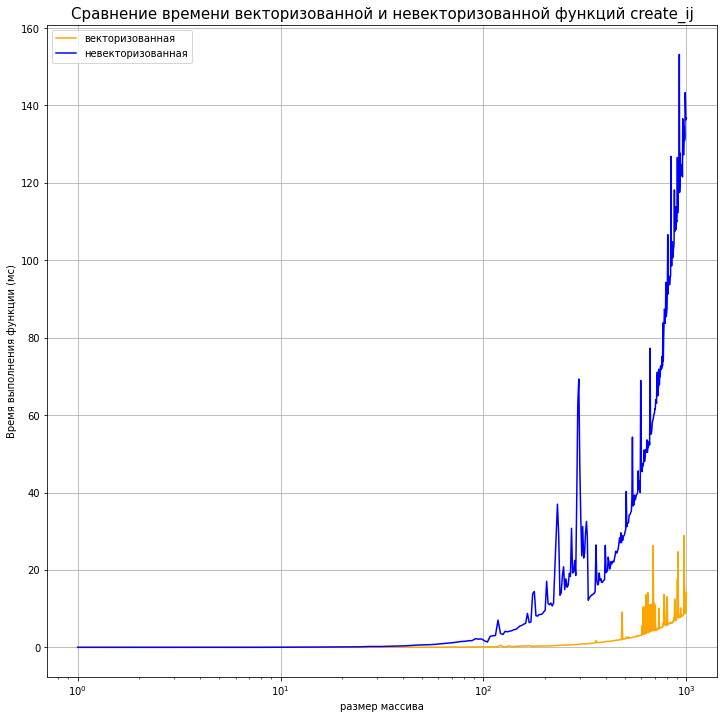

In [ ]:
def create_ij(n: int) -> np.ndarray:
    n = int(n)                              # Colab почему-то тут считает type(n) = float, а не int как раньше
    a = np.arange(n).reshape(1,n)
    b = a.reshape(n,1)
    return(np.dot(b,a))

def create_ij_imlp(n: int) -> list:
    ans = []
    for i in range(int(n)):
        l = []
        for j in range(int(n)):
            l.append(i * j)
        ans.append(l)
    return ans

x_grid = np.linspace(1, 10**3, 300)         # Colab слетает при 10**6
y_time_ij = []
for x in x_grid:
    y = time.time()
    create_ij(x)
    y_time_ij.append((time.time() - y)*1000)

y_time_ij_impl = []
for x in x_grid:
    y = time.time()
    create_ij_imlp(x)
    y_time_ij_impl.append((time.time() - y)*1000)

plt.figure(figsize=(12, 12))
plt.title('Сравнение времени векторизованной и невекторизованной функций create_ij', size = 15)
plt.ylabel('Время выполнения функции (мс)')
plt.xlabel('размер массива')
plt.plot(x_grid, y_time_ij, color='orange', label='векторизованная')
plt.plot(x_grid, y_time_ij_impl, color='b', label='невекторизованная')
plt.legend()
plt.semilogx()
plt.grid(True)
plt.show()


## Часть 3. `numpy` и математика

__Задание 7__ (1 балл). Создайте симметричную квадратную матрицу размера 1000 × 1000 (или больше, если памяти хватит), заполненную случайными независимыми (кроме симметричных относительно диагонали, конечно) числами из стандартного нормального распределения. Найдите её собственные значения и постройте гистограмму, показывающую, как распределены эти собственные значения.

In [ ]:
M = np.random.normal(0,1,size=(1000,1000))    # Генерируем матрицу со значениями из нормального распределения
M_symm = (M + np.transpose(M))/2  # Приводит ее к симметричному виду
M_symm

array([[ 0.79899903,  0.7540222 , -1.07861965, ..., -1.01499033,
        -0.68421191, -0.41124518],
       [ 0.7540222 ,  1.65898852, -0.28234896, ..., -0.10171482,
         0.8117408 ,  1.18885023],
       [-1.07861965, -0.28234896,  1.18128326, ...,  0.3985347 ,
         0.97107098,  0.5377668 ],
       ...,
       [-1.01499033, -0.10171482,  0.3985347 , ...,  0.56147516,
         0.55926833, -0.7236826 ],
       [-0.68421191,  0.8117408 ,  0.97107098, ...,  0.55926833,
         0.44358499, -1.08317139],
       [-0.41124518,  1.18885023,  0.5377668 , ..., -0.7236826 ,
        -1.08317139,  0.3455184 ]])

In [ ]:
M_lambda, M_v = np.linalg.eigh(M_symm)

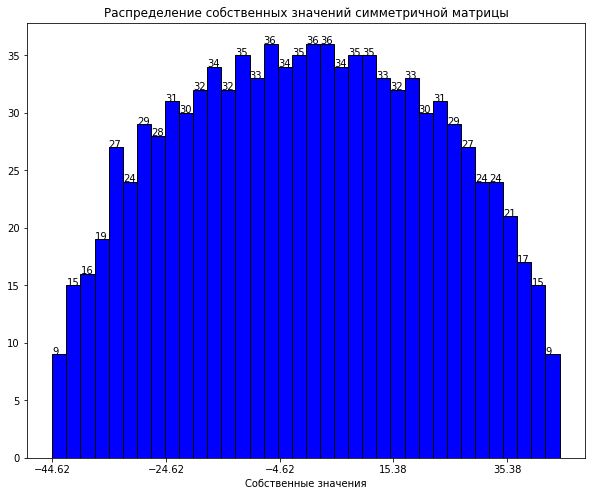

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(M_lambda, bins = int(180/5), color='blue', edgecolor='black')
ax.set_title('Распределение собственных значений симметричной матрицы')
ax.set_xlabel('Собственные значения')
ax.xaxis.set_major_locator(plt.IndexLocator(base = 20, offset =0))
for i in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x(), i.get_height()))
plt.show()

__Задание 8__ (2 балла). Напишите функцию `circle_image(M)`, которая принимает на вход двумерный `np.ndarray` размера 2×2 (матрицу) и рисует образ единичной окружности под действием оператора, заданные этой матрицей, а также собственные векторы оператора, заданного матрицей $MM^T$. Картинка должна быть нарисована таким образом, чтобы масштабы горизонтальной и вертикальной оси совпадали (в частности, прямые углы должны изображаться как прямые углы, а окружности как окружности).

In [ ]:
def circle_image(M: np.ndarray) -> None:
    phiarray = np.linspace(0, 360, 30000)
    coordarray = [np.cos(phiarray), np.sin(phiarray)]
    M_coordarray = np.dot(M, coordarray)
    M_l, M_vec = np.linalg.eigh(M @ np.transpose(M))

    v1 = np.vstack((np.zeros(2),np.linalg.eig(M@M.T)[1][0])).T[0]
    v2 = np.vstack((np.zeros(2),np.linalg.eig(M@M.T)[1][1])).T[0]

    w1 = np.vstack((np.zeros(2),np.linalg.eig(M@M.T)[1][0])).T[1]
    w2 = np.vstack((np.zeros(2),np.linalg.eig(M@M.T)[1][1])).T[1]

    plt.figure(figsize=(8, 8))
    plt.plot(M_coordarray[0], M_coordarray[1], color='b')
    plt.plot(v1, v2, color='orange')
    plt.plot(w1, w2, color='g')
    plt.axis([-3, 3, -3, 3])
    plt.show()
    pass

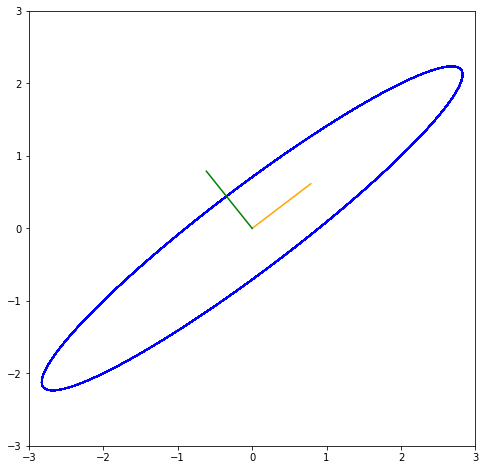

In [ ]:
circle_image(np.array([[2, 2], [1, 2]]))

__Задание 9__ (3 балла) Маша, Катя и Люба изучают выборку $x_1, \ldots, x_n$ из нормального распределения с неизвестным средним $\mu$ и дисперсией $1$. Они хотят оценить $\mu$ по этой выборке. Маша в качестве оценки использует выборочное среднее $\mathrm{\mathop{Ave}}$ (то есть просто среднее арифметическое), Катя использует [медиану выборки](https://ru.wikipedia.org/wiki/Медиана_(статистика%29), а Люба функцию $\mathrm{\mathop{midrange}}$:
$$\mathrm{\mathop{midrange}}(x_1, \ldots, x_n)=\frac{1}{2}(\max(x_1, \ldots, x_n)+\min(x_1, \ldots, x_n)).$$

1. Являются ли эти оценки несмещенными? Ответьте с помощью численного эксперимента: зафиксируйте какое-нибудь $\mu$ (например, $\mu=0$) и $n$ (например, $n=10$), сгенерируйте много (например, 10 000) выборок (как вы уже знаете, это можно сделать с помощью функции `np.random.normal`, в качестве `size` нужно передать пару `(число_выборок, n)` — получится матрица указанного  размера, заполненная случайными числами из данного распределения), для каждой найдите значение соответствующей функции (нужно использовать функции `np.mean`, `np.random`, `np.max`, `np.min`) и усредните их. Получается ли число, близкое к $\mu$? Становится ли оно ближе с увеличением числа выборок (при фиксированном $n$)?

In [ ]:
def mid_range(x: np.array) -> np.array:
    return (np.max(x, axis=1) + np.min(x, axis=1))/2

In [ ]:
X = np.random.normal(0,1,size=(5, 10000))
Masha = np.mean(X, axis = 1)                # Оценки для каждой выборки от Маши
Kate = np.median(X, axis = 1)               # Оценки для каждой выборки от Кати
Luba = mid_range(X)                         # Оценки для каждой выборки от Любы
Masha_mean = np.mean(Masha)                 # Усредненное значение по всем выобркам от Маши
Kate_mean = np.mean(Kate)                   # Усредненное значение по всем выобркам от Кати
Luba_mean = np.mean(Luba)                   # Усредненное значение по всем выобркам от Любы
print(Masha_mean, "\n", Kate_mean, "\n", Luba_mean)

-0.011555499656036325 
 -0.013031347793202312 
 0.11818368141008931


По предыдущим выборкам получается наиболее близкое число к значению $\mu$ у Маша, используя для этого среднее арифметическое, затем достаточно близкое у Кати, а у Любы получается в среднем что-то хуже чем у Кати и Маши

In [ ]:
dic = {}
for n in range(10, 41, 5):
    X = np.random.normal(0,1,size=(n, 10000))
    Masha = np.mean(X, axis = 1)                # Оценки для каждой выборки длины n, от Маши
    Kate = np.median(X, axis = 1)               # Оценки для каждой выборки длины n, от Кати
    Luba = mid_range(X)                         # Оценки для каждой выборки длины n, от Любы
    Masha_mean = np.mean(Masha)                 # Усредненное значение по всем выобркам длины n, от Маши
    Kate_mean = np.mean(Kate)                   # Усредненное значение по всем выобркам длины n, от Кати
    Luba_mean = np.mean(Luba)                   # Усредненное значение по всем выобркам длины n, от Любы
    dic[n] = [Masha_mean, Kate_mean, Luba_mean]
    print(str(n) + ": " + str(dic[n]))

10: [-0.006154854419178813, -0.005449296994756871, -0.01783791586474841]
15: [-0.0022361414379526838, -0.0032473808313707997, 0.01722553109488558]
20: [-0.001416677709060157, 0.003419451231944791, 0.017853112628911472]
25: [0.0015313515007942694, 0.0030524048614705658, 0.010659755995570732]
30: [-0.0005027268039865684, -0.0007731897305815917, -0.10397981365045877]
35: [-0.00273603842065044, -0.0019397355909309267, -0.010793831375995648]
40: [0.0018537294454109624, 0.0029762497935165643, -0.012035501709272495]


Как можно видеть на примере для 7 различных количеств выборок, разброс не так уж и велик. То есть с увеличением числа выборок эти оценки $\mu$ не улучшаются.

2. Оцените дисперсию каждой оценки для различных $n$. Зафиксируйте число выборок (допустим, 1000) и в цикле по `n` от 2 до 100 выполните следующее. Сгенерируйте 1000 выборок длиной $n$, для каждой выборки найдите значение соответствущей оценки (аналогично предыдущему пункту) и посчитайте выборочную дисперсию для полученных оценок (с помощью `.var()`). Постройте график, показывающий зависимость дисперсии каждой из оценок от $n$. Какая оценка имеет наименьшую дисперсию? Какая наибольшую?  Какую из этих оценок вы бы стали использовать, если бы хотели минимизировать квадратичную ошибку предсказания?

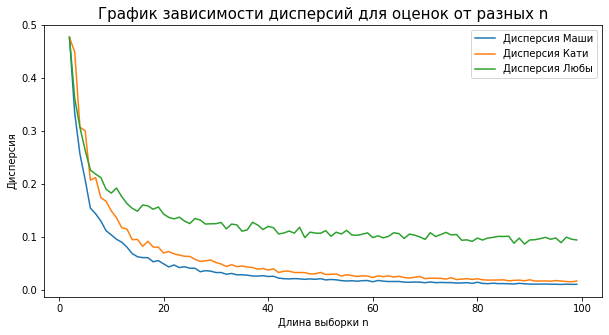

In [ ]:
Masha_v = []
Kate_v = []
Luba_v = []
for n in range(2, 100):
    X = np.random.normal(0,1,size=(1000, n))
    Masha = np.mean(X, axis = 1)                # Оценки для каждой выборки длины n, от Маши
    Kate = np.median(X, axis = 1)               # Оценки для каждой выборки длины n, от Кати
    Luba = mid_range(X)                         # Оценки для каждой выборки длины n, от Любы
    Masha_v.append(np.var(Masha))               # Усредненное значение по всем выобркам длины n, от Маши
    Kate_v.append(np.var(Kate))                 # Усредненное значение по всем выобркам длины n, от Кати
    Luba_v.append(np.var(Luba))                 # Усредненное значение по всем выобркам длины n, от Любы


# Рисуем график зависимости дисперсий для оценок Маши, Кати и Любы для разных n

plt.figure(figsize=(10,5))
x = np.arange(2,100)
plt.plot(x, Masha_v, label='Дисперсия Маши')
plt.plot(x, Kate_v, label='Дисперсия Кати')
plt.plot(x, Luba_v, label='Дисперсия Любы')
plt.title('График зависимости дисперсий для оценок от разных n', size =15)
plt.xlabel('Длина выборки n')
plt.ylabel('Дисперсия')
plt.legend()
plt.show()

Как итог мы видим, что оценка Маши имеет наименьшую дисперсию, а оценка Любы наибольшую. Для минимизации квадратичной ошибки, очевидно, лучше бы подошла оценка Маши

3. Выполните пункт 2 для равномерного распределения на отрезке $[-1, 1]$. Какая теперь оценка имеет наименьшую дисперсию? Какая наибольшую? Как вы можете объяснить разницу с предыдущим пунктом? Какую из этих оценок вы бы стали использовать в этом случае, если бы хотели минимизировать квадратичную ошибку предсказания?

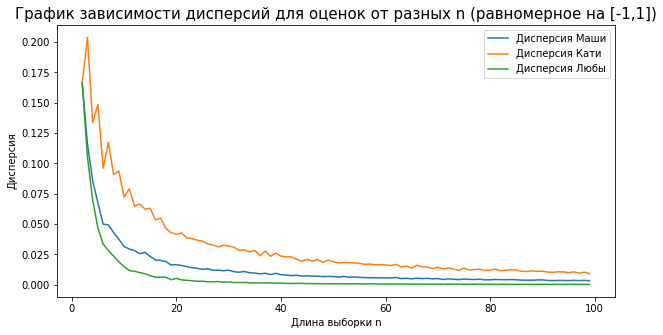

In [ ]:
Masha_vu = []
Kate_vu = []
Luba_vu = []
for n in range(2, 100):
    X = np.random.uniform(-1,1,size=(1000, n))
    Masha = np.mean(X, axis = 1)                # Оценки для каждой выборки длины n, от Маши
    Kate = np.median(X, axis = 1)               # Оценки для каждой выборки длины n, от Кати
    Luba = mid_range(X)                         # Оценки для каждой выборки длины n, от Любы
    Masha_vu.append(np.var(Masha))               # Усредненное значение по всем выобркам длины n, от Маши
    Kate_vu.append(np.var(Kate))                 # Усредненное значение по всем выобркам длины n, от Кати
    Luba_vu.append(np.var(Luba))                 # Усредненное значение по всем выобркам длины n, от Любы


# Рисуем график зависимости дисперсий для оценок Маши, Кати и Любы для разных n (равномерное на [-1,1])

plt.figure(figsize=(10,5))
x = np.arange(2,100)
plt.plot(x, Masha_vu, label='Дисперсия Маши')
plt.plot(x, Kate_vu, label='Дисперсия Кати')
plt.plot(x, Luba_vu, label='Дисперсия Любы')
plt.title('График зависимости дисперсий для оценок от разных n (равномерное на [-1,1])', size =15)
plt.xlabel('Длина выборки n')
plt.ylabel('Дисперсия')
plt.legend()
plt.show()

Из графика видно, что наименьшую дисперсию имеет оценка Любы, а наибольшую оценка Кати. Для минимизации квадратичной ошибки предсказания необходимо использовать оценку Любы.

В данном случае с какого-то размера выборки $n$ оценка Любы будет максимально близкой к среднему, так как наибольшее и наименьшее значение будет близко к граничным значениям.

### Часть 4. Разведочный анализ данных с `pandas` (4 балла)

In [ ]:
import pandas as pd

In [ ]:
! wget -O tweets.csv "https://www.dropbox.com/s/ou55qwyhbj1pdav/tweets.csv?dl=1"

--2022-02-23 12:31:10--  https://www.dropbox.com/s/ou55qwyhbj1pdav/tweets.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/ou55qwyhbj1pdav/tweets.csv [following]
--2022-02-23 12:31:10--  https://www.dropbox.com/s/dl/ou55qwyhbj1pdav/tweets.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6f6e94208b1c2e8648b65bd225.dl.dropboxusercontent.com/cd/0/get/BgR-xgst5eqcbglpgYrEPq488CtDWq1IPK87aAbyLYcy7sBXQ-CjZvAkVR-5WFmA6pp1thJ-85Ir4iXuxMUvFlXzHWj-UCWSusXJXl0ypn7MCttCmsuk3eMfJToyYSgVpf7yaPegOjGuOuUGzUUR79sy/file?dl=1# [following]
--2022-02-23 12:31:11--  https://uc6f6e94208b1c2e8648b65bd225.dl.dropboxusercontent.com/cd/0/get/BgR-xgst5eqcbglpgYrEPq488CtDWq1IPK87aAbyLYcy7sBXQ-CjZvAkVR-5WFmA6pp1thJ-85Ir4iXuxMUvFlXzHWj

In [ ]:
df = pd.read_csv("./tweets.csv")
df.head()

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount
0,410745723928731648,1386764386,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11
1,409580147185315840,1386486491,pifelanybal,Google сменил алгоритм чексуммы в загребании P...,-1,0,0,0,130,100,86
2,419794699738570752,1388921830,RomanenkoJulya,"мне надо домой, @RomaRudenko1 не отпускает(",-1,0,0,0,730,28,18
3,410625694087909376,1386735769,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537
4,410849586635628545,1386789149,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48


__Задание 10__ Создайте колонку `num_mentions`, в которой посчитайте, сколько раз в каждом из твитов были упомянуты логины других пользователей (считаются только упоминания, начинающиеся с `@`)

In [ ]:
def count_mentions(tweet: str) -> int:
    return tweet.count('@')
    pass

assert count_mentions("some_text @user1 @user2") == 2

df['num_mentions'] = df['ttext'].apply(count_mentions)

__Задание 11__. Создайте колонку `'tdif'`, равную разнице числа друзей и числа фолловеров у пользователя.

In [ ]:
df['tdif'] = abs(df['tfol'] - df['tfrien'])

__Задание 12__. Создайте датафрейм, в котором остались лишь твиты положительной тональности.

In [ ]:
newdf = df.loc[df['ttype'] > 0]

__Задание 13__. Посчитайте число уникальных пользователей (пользователей с различными `tmane`).

In [ ]:
len(np.unique(df['tmane']))

139658

__Задание 14__. Посчитайте основные статистики по числу подписчиков (фолловеров) при помощи метода `.describe()`. Постройте гистограмму значений признака.

In [ ]:
df['tfol'].describe()

count    2.268340e+05
mean     7.584972e+03
std      2.039972e+04
min      0.000000e+00
25%      4.730000e+02
50%      2.026000e+03
75%      7.562000e+03
max      1.138639e+06
Name: tfol, dtype: float64

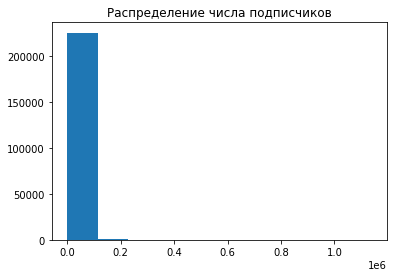

In [ ]:
plt.hist(df['tfol'])
plt.title('Распределение числа подписчиков')
plt.show()

__Задание 15__. Посчитайте число ретвитов в датасете (твитов, начинающихся с "RT @").

In [ ]:
df_copy = df.copy()
df_copy['loc_ttext'] = df_copy['ttext'].apply(lambda x: x[0:4])
df_ret = df_copy.loc[df_copy['loc_ttext'] == 'RT @']
df_ret.shape[0]

36462

__Задание 16__. Назовём длинными такой твит, что все более короткие твиты составляют по меньшей мере 80% от всего датасета. Найдите число длинных твитов.

In [ ]:
df_copy = df.copy()
df_copy['len_ttext'] = df_copy['ttext'].apply(lambda x: len(x))
bte = np.percentile(df_copy['len_ttext'], 80)
df_bte = df_copy.loc[df_copy['len_ttext'] > bte]
df_bte['len_ttext'].count()

45081

__Задание 17__. Постройте столбчатую диаграмму (или гистограмму) распределения числа твитов по месяцам. В какой месяц какого года было опубликовано больше всего твитов?

In [ ]:
import datetime

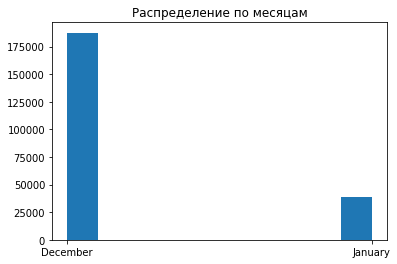

In [ ]:
def month(x):
    return datetime.datetime.fromtimestamp(x).strftime('%B')

df_copy = df.copy()
df_copy['month_tdate'] = df_copy['tdate'].apply(month)

plt.hist(df_copy['month_tdate'])
plt.title('Распределение по месяцам')
plt.show()

### Часть 5. метод k ближайших соседей

В этой части мы решим задачу классификации с помощью kNN. Вам могут понадобится несколько функций из библиотеки [scipy](https://scipy.org/) (в соответствующих местах это написано явно). Библиотека `scipy` используется для научных и технических вычислений, которые выполняются над уже знакомыми вам массивами `np.array`.

__Задание 18__ (4 балла)

В этом задании вам предстоит написать функцию, аналог которой есть в библиотеке *scikit-learn* (`sklearn`). Реализовывать различные методы машинного обучения «с нуля» очень полезно: способность реализовать какой-то метод самому — это главный критерий того, что вы понимаете, как он работает. В то же время, разбираться в существующих библиотеках тоже полезно — именно с ними вам придётся столкнуться в любой практической работе. В следующем практическом ДЗ мы будем использовать `sklearn`, а пока что придётся обойтись без этой библиотеки.

Вам предстоит реализовать две версии метода $k$ ближайших соседей (kNN) — обычный (который подробно обсуждался на семинаре) и со взвешиванием.

В качестве метрики мы будем использовать $d_p(\cdot,\ \cdot)$ — [расстояние Минковского](https://en.wikipedia.org/wiki/Minkowski_distance) порядка $p$.



Пусть нам нужно вычислить значение $y$ для некоторого $x_{new}$, наши данные заданы как $\{x_i, y_i\}_{i=1}^l$. Обычный метод $k$ ближайших соседей находит такие $i_1, \ldots, i_k$, что $\{x_{i_m}\}_{m=1}^k$ являются $k$ ближайшими соседями для точки $x_{new}$ (по выбранной метрике $d_p(\cdot,\ \cdot)$), и полагает, что значение нового объекта:

$$\widehat{y} = \underset{c \in C}{\mathrm{argmax}}\ \sum_{m=1}^k[y_{i_m} = c],$$
где $C$ — множество классов, а $[y_{i_m}=c]$ — выражение, равное 1, если $y_{i_m}=c$, и 0 в противном случае. То есть $\widehat y$ — мода классов $k$ ближайших соседей. Модифицированный метод $k$ ближайших соседей, который вам предстоит реализовать, использует другую оценку:

$$\widehat y = \underset{c \in C}{\mathrm{argmax}} \sum_{i=1}^l w_{i}[y_i=c],$$
где вес $w_i$ вычисляется следующим образом:
$$
    w_i = \cfrac{\exp(-d_p(x_{new}, x_i))}{\sum_{j=1}^l \exp(-d_p(x_{new}, x_j))}
$$


Таким образом, модифицированный метод присваивает $i$-му объекту вес $w_{i}$, уменьшающийся с увеличением расстояния до $x_{new}$, вместо того чтобы присваивать $k$ ближайшим соседям вес $1$, а остальным $0$.

---

Ниже предоставлен шаблон функции для реализации метода, который возвращает предсказания для тестовой выборки, используя взвешенный или обычный kNN (с возможностью выбора порядка $p$ метрики расстояния). В отличие от семинара, ваша функция принимает не одну точку `x_new`, а двумерный массив `x_test`, аналогичный `x_train` (но, возможно, с другим количеством строк), и для каждой строки в `x_train` должна выдать соответствующее предсказание. Таким образом, на выходе у функции будет одномерный массив, число элементов которого равно числу строк в `x_test`. Для простоты, мы будем считать, что у нас задача двухклассовой классификации, и $y$ принимает значения 0 или 1. (Но вы можете подумать, как реализовать аналогичную функцию для многоклассовой классификации — это тоже можно сделать без циклов!)

---

Полный балл за эту задачу ставится в том случае, если решение не использует циклы. За решение с циклами можно получить не больше **3 баллов**. Если без циклов всё-таки не удалось обойтись, старайтесь использовать их по-минимуму.

**Подсказка.** Чтобы решить эту задачу без циклов, нужно использовать много магии `numpy`. Для каждой точки из `x_test` нужно найти её ближайших соседей в `x_train`; чтобы это сделать для всех точек из `x_test`, вам нужно найти все попарные расстояния между `x_train` и `x_test`. Существует библиотечная функция в `scipy`, которая позволяет это сделать быстро и без циклов - [`scipy.spatial.distance.pdist`](https://scipy.github.io/devdocs/reference/generated/scipy.spatial.distance.pdist.html). На семинаре обсуждалось, как можно использовать `np.argsort`, чтобы найти самого близкого соседа, второго по близости и т.д. В этой задаче вам нужно обобщить подход из семинара на двумерные массивы. Оказывается, как и у многих других функций в `numpy`, у `np.argsort` есть аргумент `axis` — с его помощью можно в каждой строке или каждом столбце найти самый маленький элемент, второй по маленькости и т.д. Чтобы понять, как всё это работает, проще всего создать какой-нибудь небольшой двумерный массив и поэкспериментировать с `np.argsort` и `axis`.

Следующую подсказку проще всего показать на примере:

In [55]:
z = np.array([0, 11, 22, 33, 44])
indices = np.array([[2, 3],
                    [1, 2],
                    [4, 4]])
z[indices]

array([[22, 33],
       [11, 22],
       [44, 44]])

 Для выбора наиболее часто встречающегося элемента можно использовать [`scipy.stats.mode`](https://scipy.github.io/devdocs/reference/generated/scipy.stats.mode.html). 

**Внимание!** Вычисление весов $w_i$ исключительно через функции `np.sum` и `np.exp` может быть численно неустойчивым. Воспользуйтесь функцией [`scipy.special.softmax`](https://scipy.github.io/devdocs/reference/generated/scipy.special.softmax.html).

In [54]:
from scipy.special import softmax
from scipy.spatial import distance
from scipy import stats

In [119]:
def knn_classifier(x_train, y_train, x_test, k=1, p=1, weight=False):
    """
    x_train is np.array with shape (l, d) (matrix with l rows, d columns)
    y_train is np.array with shape (l, ) (1-dimensional array with l elements)
    x_test is np.array with shape (n, d) (matrix with n rows, d columns)
    k is int (if weight is True, then the argument is ignored, else - number of neighbours)
    p is int (order p of Minkowski distance)
    weight is boolean, whether to use the weighted method or not

    return y_test, np.array with shape (n, ) (1-dimensional array with n elements)
    """
    def y_h(c):
        result = np.sum( w[np.where(y_train == c)] )
        return result

    distances = []
    for i in range(len(x_train)):
        l = []
        for x_j in x_test:
            l.append(abs(distance.minkowski(x_train[i], x_j, p)))
        distances.append(l)
    indexes = np.argsort(distances, axis=1)[:k]
    k_first = y_train[indexes]
    
    w = np.ones(len(y_train))
    distances_minus = []
    for i in distances:
        l = []
        for j in range(len(i)):
            l.append(-1*i[j])
        distances_minus.append(l)
    if weight == True:
        w = softmax(distances_minus)
    y_f = np.vectorize(y_h)
    return k_first[np.argmax(y_f(k_first))]


    

In [120]:
np.random.seed(42)
l = 500
x_train = np.random.normal(size=(l, 10))
y_train = np.random.randint(2, size=l)
x_test = np.random.normal(size=(100, 10))
assert np.all(np.isclose(
    knn_classifier(x_train, y_train, x_test, k=1, weight=True),
    np.array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1])
))

assert np.all(np.isclose(knn_classifier(x_train, y_train, x_test, p=1, weight=False, k=3),
          np.array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
                   0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
                   1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
                   1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1])))

AssertionError: ignored

Это то как я решал, если вам поможет это накинуть мне немного баллов))

In [110]:
np.random.seed(42)
l = 10
x_train = np.random.normal(size=(l, 10))
y_train = np.random.randint(2, size=l)
x_test = np.random.normal(size=(5, 10))

def knn_classifier(x_train, y_train, x_test, k=1, p=1, weight=False):
    def y_h(c):
        result = np.sum( w[np.where(y_train == c)] )
        return result

    distances = []
    for i in range(len(x_train)):
        l = []
        for x_j in x_test:
            l.append(abs(distance.minkowski(x_train[i], x_j, p)))
        distances.append(l)
    indexes = np.argsort(distances, axis=1)[:k]
    k_first = y_train[indexes]
    
    w = np.ones(len(y_train))
    distances_minus = []
    for i in distances:
        l = []
        for j in range(len(i)):
            l.append(-1*i[j])
        distances_minus.append(l)
    if weight == True:
        w = softmax(distances_minus)
    y_f = np.vectorize(y_h)
    return k_first[np.argmax(y_f(k_first))]

knn_classifier(x_train, y_train, x_test, k=1, weight=True)

# print(y_train)
# p=1

# distances = []
# for i in range(len(x_train)):
#     l = []
#     for x_j in x_test:
#         l.append(abs(distance.minkowski(x_train[i], x_j, p)))
#     distances.append(l)
# print(distances)
# print(np.argsort(distances, axis=1))
# distances_minus = []
# for i in distances:
#     l = []
#     for j in range(len(i)):
#         l.append(-1*i[j])
#     distances_minus.append(l)
# print(distances_minus)

# sorted_tuples = sorted(distances.items(), key=lambda item: item[1])
# sorted_distances = {k: v for k, v in sorted_tuples}
# for x in sorted_distances:
#     print(str(x)+' : '+str(distances[x]))

array([0, 1, 0, 0, 0])